<a href="https://colab.research.google.com/github/nhat132940/CS114.L21.KHCL/blob/main/Predict_Final_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Dự đoán điểm cuối kì***
## ***Lớp: CS114.L21.KHCL***
## ***Thành viên nhóm:***
+ Phan Minh Nhật - 19521956
+ Lê Võ Tiến Phát - 19521993
+ Hồ Thịnh - 19522274

References: 
- https://pandas.pydata.org/docs/
- https://matplotlib.org/




#**1. Load data**



In [ ]:
import pandas as pd
#Load dữ liệu
wecode_data = pd.read_csv('/content/wecode.csv')
score_training_data = pd.read_csv('/content/score_training.csv')

In [ ]:
wecode_data.head()

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07


In [ ]:
score_training_data.head()

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05


In [ ]:
#Thông tin dữ liệu
wecode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


In [ ]:
score_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


*Ta thấy kiểu dữ liệu của cột cuối kì là object, vì vậy để vẽ được scatter plot thì ta phải chuyển nó về kiểu số.*

In [ ]:
#Chuyển kiểu dữ liệu của cột CK về dạng số
score_training_data['CK'] = score_training_data['CK'].apply(pd.to_numeric, errors='coerce')

#**2. Preprocessing data** 

In [ ]:
#Lấy các cột cần thiết
wecode_data1 = wecode_data[['user_id', 'is_final', 'pre_score']]
score_training_data1 = score_training_data[['id','CK']]

#Đổi tên cột id trong file score_training thành user_id để giống file wecode 
score_training_data2 = score_training_data1.rename(columns = {'id' : 'user_id'})


In [ ]:
wecode_data1.head()

,user_id,is_final,pre_score
0,4,1,10000
1,4,1,10000
2,4,0,0
3,4,0,0
4,4,0,0


In [ ]:
score_training_data2.head()

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10.0
3,28,9.5
4,29,8.5


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Hàm kiểm tra submit đúng
def right_submission(df):
    if (df['is_final'] == 1) and (df['pre_score'] == 10000):
      return 1
    else:
      return 0

#Thêm cột bài nộp có đúng hay không
wecode_data1['right_submission'] = wecode_data1.apply(right_submission, axis=1)

#Gom nhóm theo user_id
groupby_user_id = wecode_data1.groupby(by='user_id', sort=True)

#Tạo bảng mới chứa các thông tin cần thiết
new_file = pd.DataFrame({'number_of_right_submission': groupby_user_id['right_submission'].sum(),
                        'sum_pre_score': groupby_user_id['pre_score'].sum(),
                        'submit_times': groupby_user_id['user_id'].count(),})

#Thêm cột tỉ lệ nộp bài đúng vào new_file
new_file['right_submit_rate'] = new_file['number_of_right_submission'] / new_file['submit_times']

#Trộn 2 bảng chứa thông tin cần thiết lại với nhau
new_file = new_file.merge(score_training_data2, on = 'user_id')

new_file


,user_id,number_of_right_submission,sum_pre_score,submit_times,right_submit_rate,CK
0,24,72,1031674,164,0.439024,9.5
1,27,3,52000,13,0.230769,10.0
2,29,72,1225828,199,0.361809,8.5
3,34,81,1206981,218,0.371560,6.5
4,35,145,1809718,297,0.488215,4.5
...,...,...,...,...,...,...
848,1856,23,329074,64,0.359375,7.5
849,1857,37,389000,55,0.672727,4.0
850,1859,3,39000,31,0.096774,1.5
851,1862,4,40000,12,0.333333,7.5


**Visualize and evaluate**

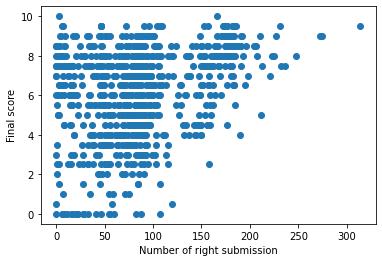

In [ ]:
#Visualize mối liên hệ giữa số lượng bài nộp đúng và điểm cuối kì
x = np.array(new_file['number_of_right_submission'])
y = np.array(new_file['CK'])
plt.xlabel('Number of right submission')
plt.ylabel('Final score')
plt.scatter(x,y)
plt.show()

Từ scatter plot trên ta có thể thấy được:
- Trong khoảng số lượng bài nộp đúng từ 0 đến 100, các điểm phân bố khá đều trong khoảng điểm CK 2 cho đến 9 điểm, trong khoảng này ta chưa thể thấy được mối liên hệ giữa điểm cuối kì và số lượng bài nộp đúng.
- Trong khoảng 100 đến 250, ta có thể thấy số lượng bài nộp đúng càng nhiều thì điểm cuối kì càng cao.

***Vậy ta có thể dựa vào yếu tố số lượng bài nộp đúng để dự đoán điểm cuối kì, tuy nhiên kết quả dự đoán có thể không chính xác vì có các điểm dữ liệu bất thường(ví dụ như các điểm có số bài nộp đúng rất ít nhưng vẫn được điểm rất cao).***




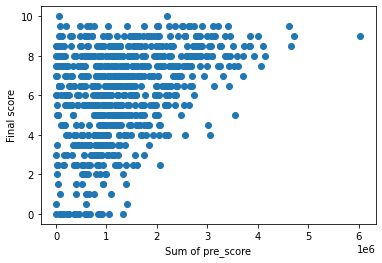

In [ ]:
#Visualize mối liên hệ giữa tổng pre_score và điểm cuối kì
x = np.array(new_file['sum_pre_score'])
y = np.array(new_file['CK'])
plt.xlabel('Sum of pre_score')
plt.ylabel('Final score')
plt.scatter(x,y)
plt.show()

Từ scatter plot ta thấy:
- Trong khoảng pre_score từ 0 đến khoảng 1400000, các điểm phân bố khá đều với điểm CK từ 0 dến 9.5.
- Từ khoảng 1400000 về sau, hầu hết khi pre_score càng cao thì điểm cuối kì càng cao.

**Vậy ta thấy yếu tố tổng pre_score có mối liên với điểm cuối kì khá giống với yếu tố số lượng bài nộp đúng. Ta có thể dùng được yếu tố này nhưng độ chính xác sẽ không cao vì sẽ có nhiều điểm dữ liệu bất thường.**

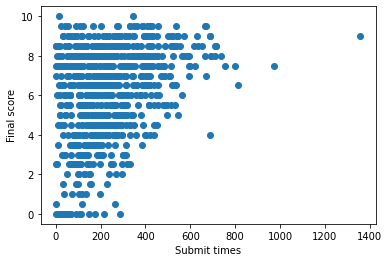

In [ ]:
#Visualize mối liên hệ giữa số lần nộp bài và điểm cuối kì
x = np.array(new_file['submit_times'])
y = np.array(new_file['CK'])
plt.xlabel('Submit times')
plt.ylabel('Final score')
plt.scatter(x,y)
plt.show()

Từ scatter plot ta thấy:
- Các điểm dữ liệu phân bố khá dày trong khoảng 0 đến 400 lần nộp, với điểm cuối kì trong khoảng 4 đến 9 điểm.
- Sau khoảng 400 lần nộp này thì chỉ có điểm CK là 4 trở lên.

**Yếu tố số lần nộp bài cũng khá giống với các yếu tố trên,
độ chính xác sẽ không cao, có thể cân nhắc để thử khi train model.**

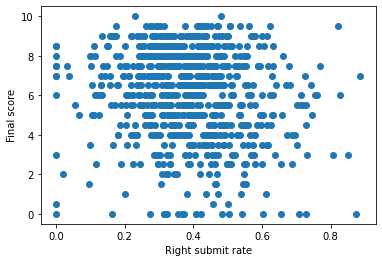

In [ ]:
#Visualize mối liên hệ giữa tỉ lệ nộp bài đúng và điểm cuối kì
x = np.array(new_file['right_submit_rate'])
y = np.array(new_file['CK'])
plt.xlabel('Right submit rate')
plt.ylabel('Final score')
plt.scatter(x,y)
plt.show()

Từ scatter plot ta thấy:
- Ta thấy trong khoảng tỉ lệ nộp bài đúng từ 0.2 đến 0.6, các điểm dữ liệu phân bố khá đều, với điểm CK trong khoảng 0 đến 9.5 điểm.
- Có khá nhiều điểm dữ liệu bất thường. VD: có các điểm có tỉ lệ nộp đúng cao nhưng điểm cuối kì thấp và các điểm có tỉ lệ nộp đúng thấp thì lại có điếm cao.

**Nếu dùng yếu tố này để train model thì độ chính xác sẽ khá thấp, không nên dùng để train model.** 


### **Nhận xét:**
- Với bộ dữ liệu cho trước này, khá khó để tìm được yếu tố để có được kết quả chính xác nhất.
- Có thể thử lần lượt các yếu tố ở trên hoặc nhiều yếu tố cùng lúc để áp dụng vào model rồi đánh giá độ chính xác qua mỗi lần thử --> Tìm ra các yếu tố có độ chính xác cao nhất.

##**3. Train model**

In [ ]:
#Tách dữ liệu thành 2 phần khác nhau
#Xóa các hàng chưa có điểm cuối kì để được dữ liệu train
train_data = new_file.dropna(how='any')
#Lấy các hàng chưa có điểm cuối kì để predict
predict_data = new_file[new_file.isna().any(axis=1)]

In [ ]:
train_data.head(10)

,user_id,number_of_right_submission,sum_pre_score,submit_times,right_submit_rate,CK
0,24,72,1031674,164,0.439024,9.5
1,27,3,52000,13,0.230769,10.0
2,29,72,1225828,199,0.361809,8.5
3,34,81,1206981,218,0.371560,6.5
4,35,145,1809718,297,0.488215,4.5
5,37,93,1550820,312,0.298077,7.5
6,40,207,3356653,664,0.311747,8.0
7,41,61,831328,110,0.554545,8.0
8,42,191,2411386,324,0.589506,7.5
9,43,148,2378013,448,0.330357,6.0


In [ ]:
predict_data.head(10)

,user_id,number_of_right_submission,sum_pre_score,submit_times,right_submit_rate,CK
14,51,38,446194,86,0.441860,NaN
96,240,126,3066214,623,0.202247,NaN
164,391,102,2085960,379,0.269129,NaN
240,513,130,3222566,672,0.193452,NaN
278,586,123,2113473,296,0.415541,NaN
335,705,118,1859632,328,0.359756,NaN
363,772,112,1657940,292,0.383562,NaN
365,774,98,1365874,197,0.497462,NaN
366,776,99,1338650,264,0.375000,NaN
375,792,158,2861806,422,0.374408,NaN


***Train lần lượt với các cột để đánh giá độ chính xác***

Sau khi thử qua một số thuật toán classification để train thì có Support Vector Machine là chạy thành công trên bộ dữ liệu này.

References: https://analyticsindiamag.com/7-types-classification-algorithms/

In [ ]:
#Hàm làm tròn điểm cuối kì
def round_CK(x):
    x = np.round(x,1)
    return x

Việc làm tròn điểm sẽ làm giảm MSE ở một số feature, đồng thời giúp dữ liệu sau khi dự đoán dễ nhìn hơn.


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svm = SVR()

#dữ liệu train
x = np.array(train_data[['sum_pre_score']])
y = np.array(train_data['CK'])
#train model
svm.fit(x,y)
y_predict = round_CK(svm.predict(x))
#Tính mean squared error
print('MSE (sum_prescore): ', mean_squared_error(y, y_predict))

MSE (sum_prescore):  4.298325062034739


In [ ]:
#Train với cột right_submit_rate
#dữ liệu train
x = np.array(train_data[['right_submit_rate']])
y = np.array(train_data['CK'])
#train model
svm.fit(x,y)
y_predict1 = round_CK(svm.predict(x))
#Tính mean squared error
print('MSE (right_submit_rate):', mean_squared_error(y, y_predict1))

MSE (right_submit_rate): 5.026923076923078


In [ ]:
#Train với cột number_of_right_submission
#dữ liệu train
x = np.array(train_data[['number_of_right_submission']])
y = np.array(train_data['CK'])
#train model
svm.fit(x,y)
y_predict2 = svm.predict(x)
#Tính mean squared error
print('MSE (right_submissions):', mean_squared_error(y, y_predict2))

MSE (right_submissions): 4.5417170855643425


In [ ]:
#Train với cột submit_times
#dữ liệu train
x = np.array(train_data[['submit_times']])
y = np.array(train_data['CK'])
#train model
svm.fit(x,y)
y_predict2 = svm.predict(x)
#Tính mean squared error
print('MSE (submit_times):', mean_squared_error(y, y_predict2))

MSE (submit_times): 4.5561732707760285


In [ ]:
#Train với nhiều cột
train_cols = ['number_of_right_submission','sum_pre_score', 'submit_times']
#dữ liệu train
x = np.array(train_data[train_cols])
y = np.array(train_data['CK'])
#train model
svm.fit(x,y)
y_predict = round_CK(svm.predict(x))
#Tính mean squared error
print('MSE (all columns): ', mean_squared_error(y, y_predict))

MSE (all columns):  4.309900744416874


**Nhận xét:**
Sau khi train với các cột khác nhau thì ta thấy:
- MSE thấp nhất là khi train với cột sum_pre_score.
- MSE cao nhất khi train với cột right_submit_rate (vì vậy ta không chọn cột right_submit_rate khi train với nhiều cột).

Vậy ta sẽ predict thông qua sum_pre_score.

In [ ]:
#Dự đoán cột điểm cuối kì còn thiếu
predict_data['CK'] = round_CK(svm.predict(predict_data[['sum_pre_score']]))
predict_data = predict_data.reset_index()
predict_data = predict_data.drop(columns=['level_0','index'])
predict_data

,user_id,number_of_right_submission,sum_pre_score,submit_times,right_submit_rate,CK
0,51,38,446194,86,0.441860,5.6
1,240,126,3066214,623,0.202247,8.2
2,391,102,2085960,379,0.269129,7.1
3,513,130,3222566,672,0.193452,8.2
4,586,123,2113473,296,0.415541,7.1
5,705,118,1859632,328,0.359756,7.0
6,772,112,1657940,292,0.383562,6.9
7,774,98,1365874,197,0.497462,6.5
8,776,99,1338650,264,0.375000,6.4
9,792,158,2861806,422,0.374408,8.2
